In [80]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

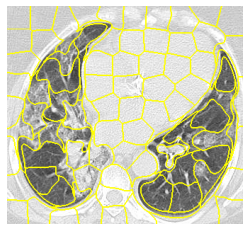

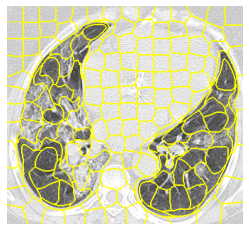

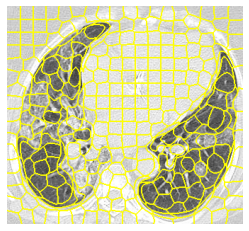

In [104]:
path = ('/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/datasets/archive/train/COVID')
IMG_name = 'Covid (1001).png'
img_path = path + '/' + IMG_name
# load the image and convert it to a floating point data type
image = img_as_float(cv2.imread(img_path))
# loop over the number of segments
for numSegments in (100, 200, 300):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = numSegments, sigma  = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("off")
# show the plots
plt.show()
fig.savefig("/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/saved_images/segments.svg", format='svg', dpi=1200)

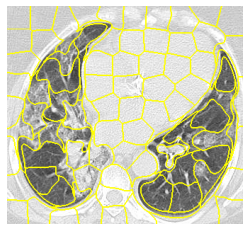

In [109]:
# load the image and convert it to a floating point data type
image = img_as_float(cv2.imread(img_path))
segments = slic(image, n_segments = 100, sigma  = 5)
# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")
# show the plots
plt.show()
# fig.savefig("/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/saved_images/segments200.svg", format='svg', dpi=1200)

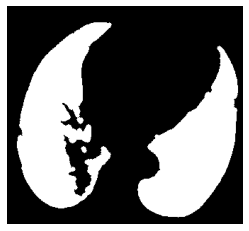

In [111]:
from skimage import color, morphology
# Compute a mask
lum = color.rgb2gray(image)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.8, 500), 500)

mask = morphology.opening(mask, morphology.disk(3))
# maskSLIC result
#m_slic = slic(image, n_segments=100, mask=mask, start_label=1)
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
#ax.imshow(mark_boundaries(image, m_slic))
ax.imshow(mask, cmap="gray")
#ax.set_title("Mask")
plt.axis("off")
# show the plots
plt.show()
fig.savefig("/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/saved_images/morphology_mask.svg", format='svg', dpi=1200)

In [84]:
test_image = cv2.imread(img_path, 0)

/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


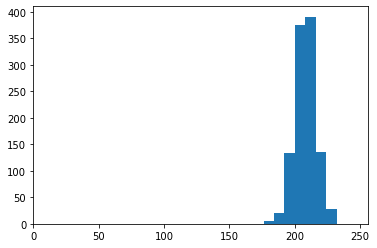

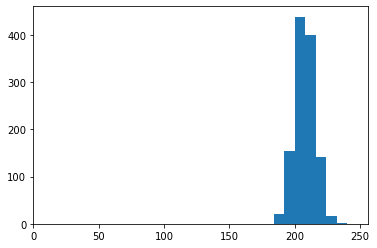

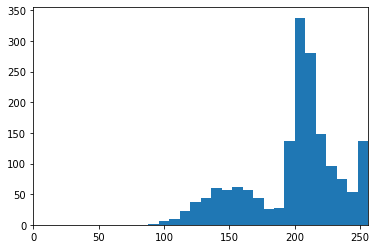

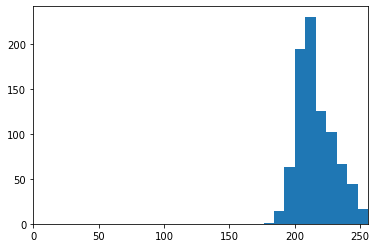

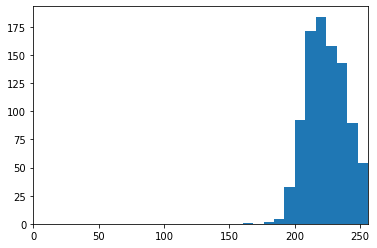

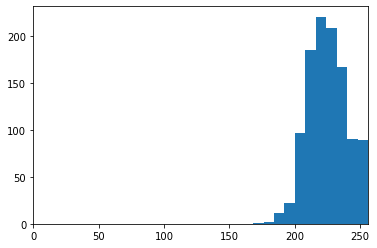

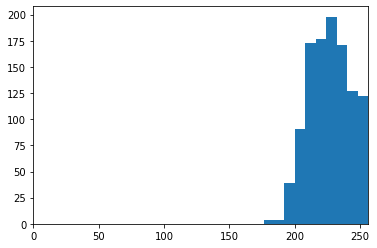

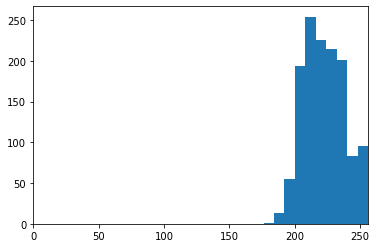

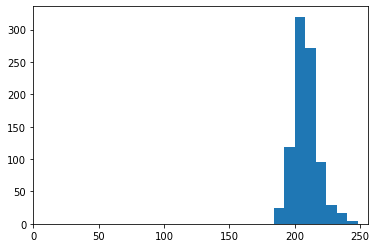

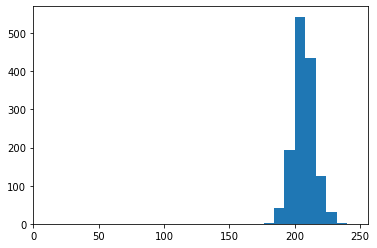

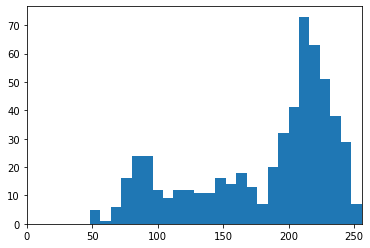

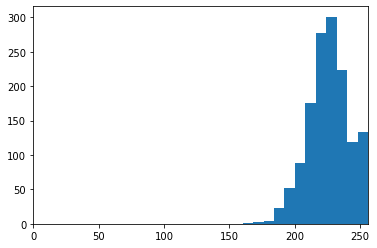

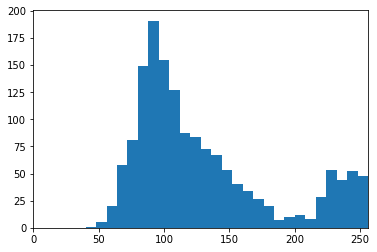

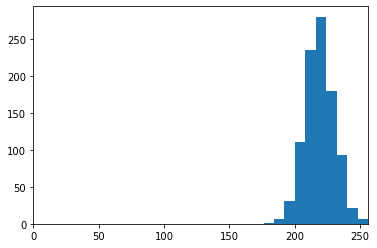

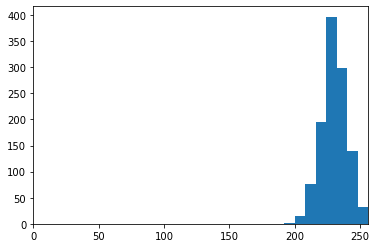

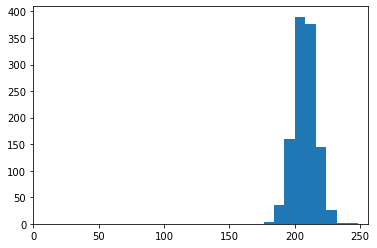

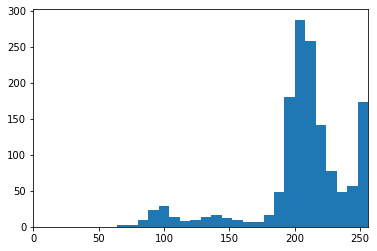

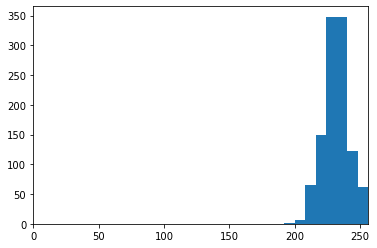

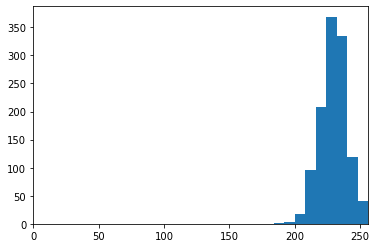

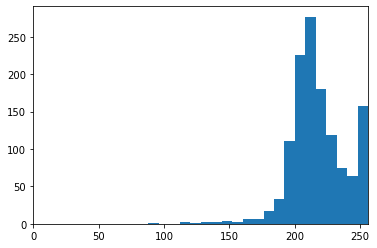

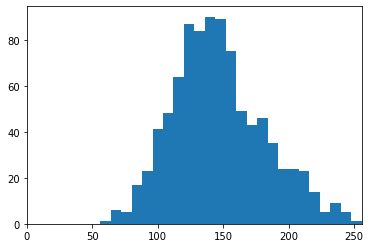

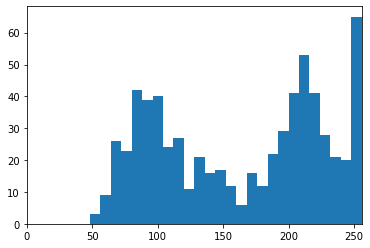

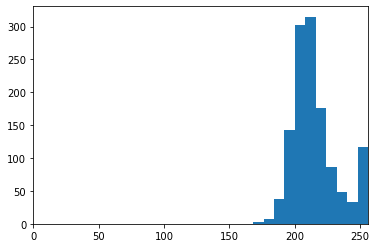

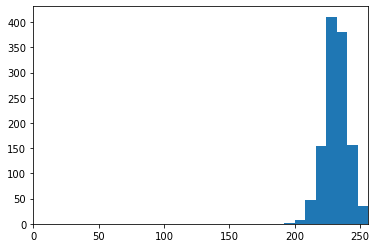

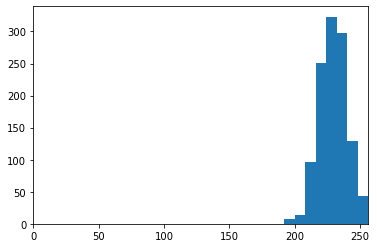

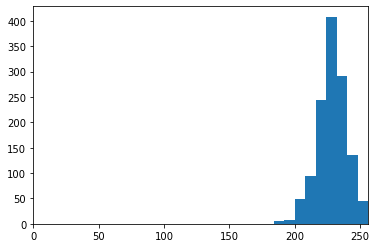

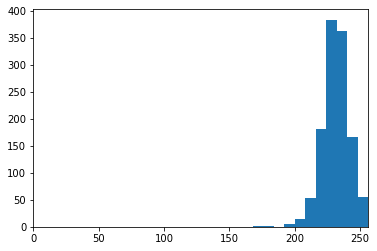

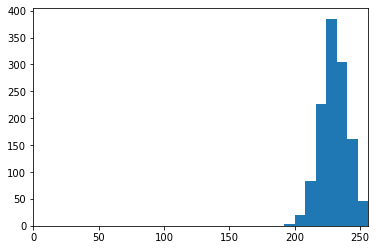

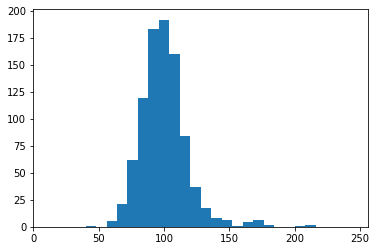

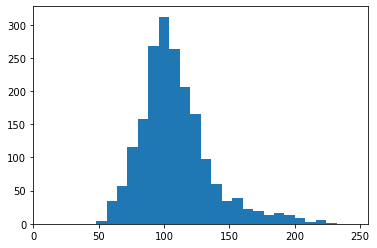

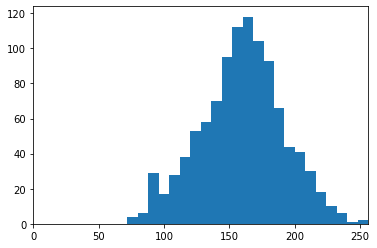

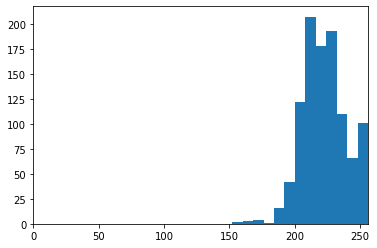

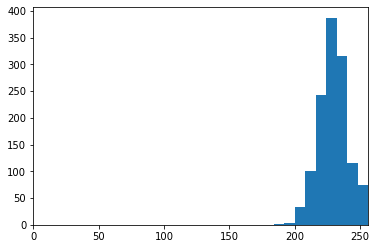

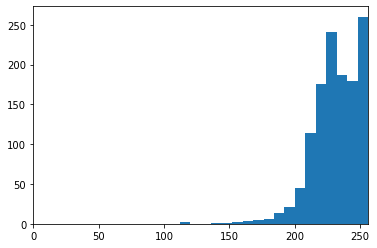

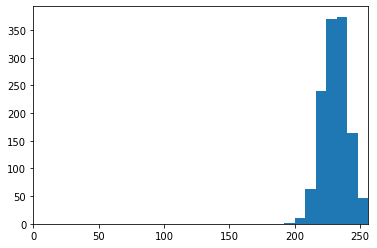

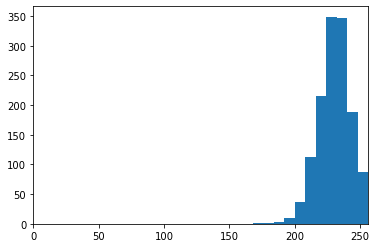

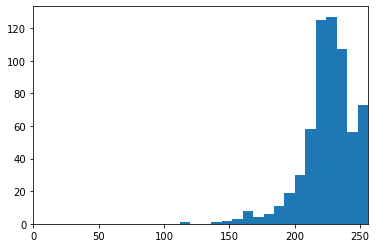

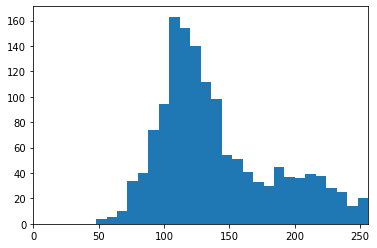

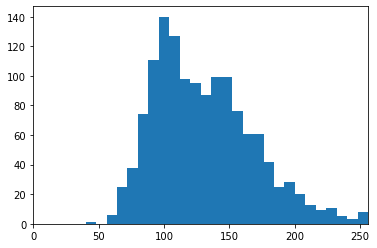

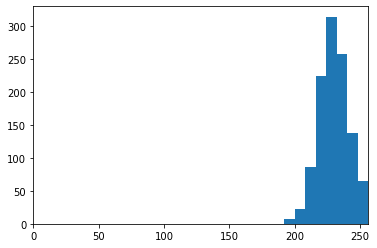

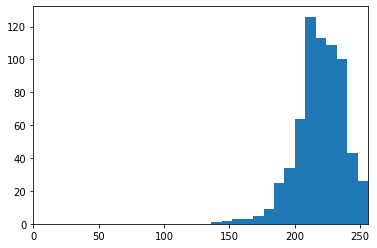

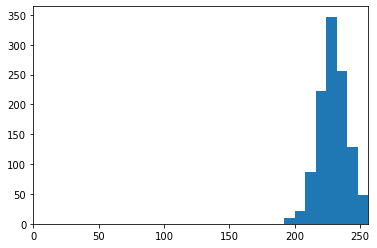

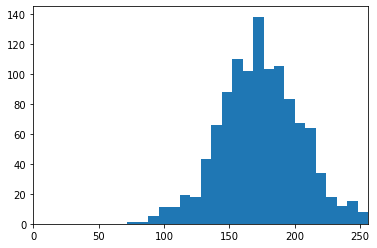

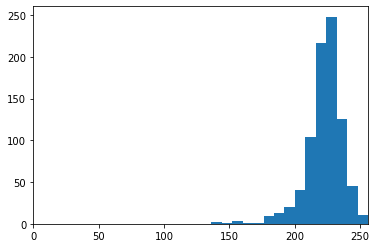

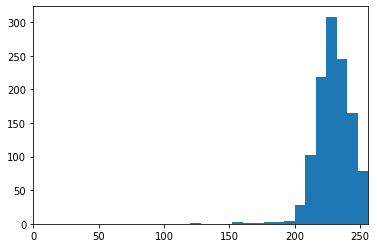

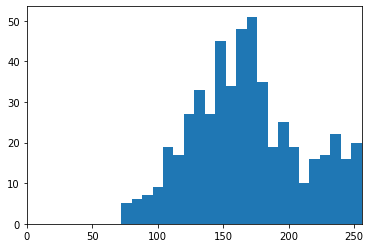

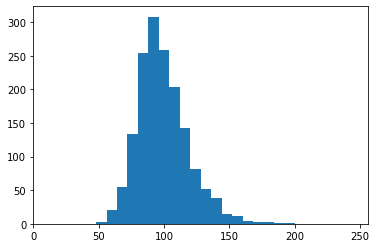

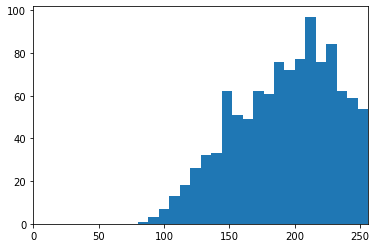

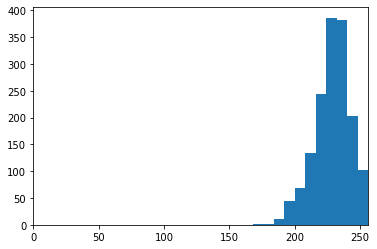

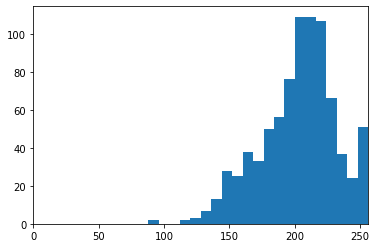

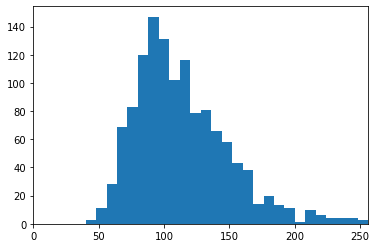

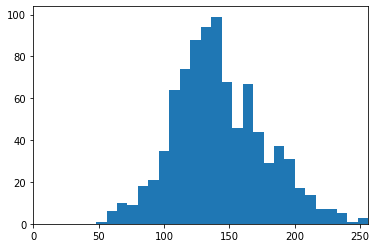

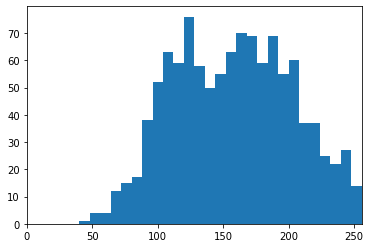

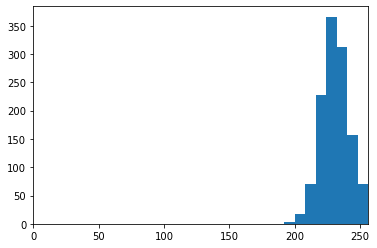

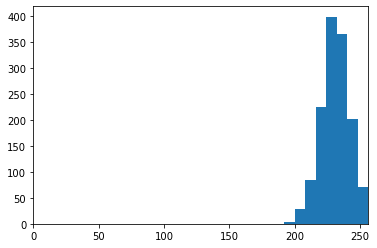

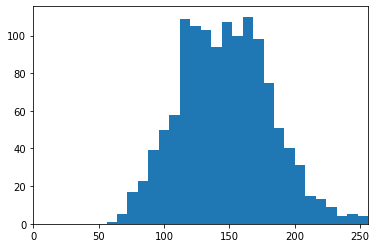

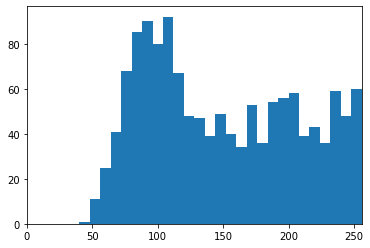

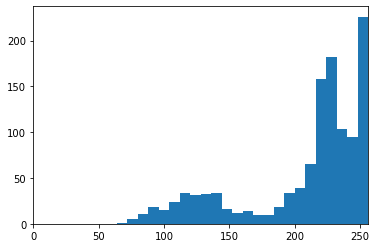

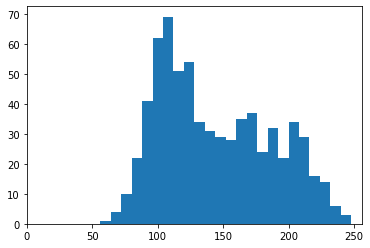

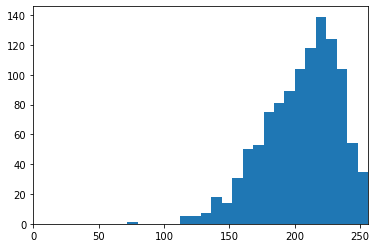

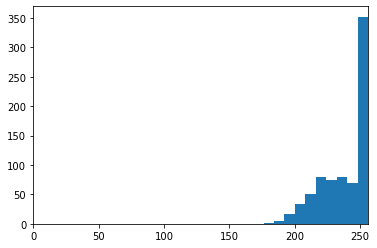

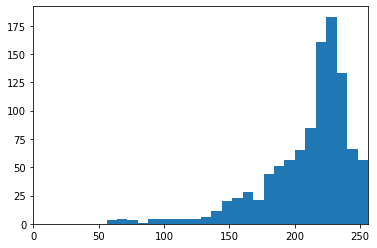

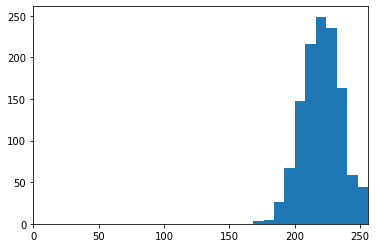

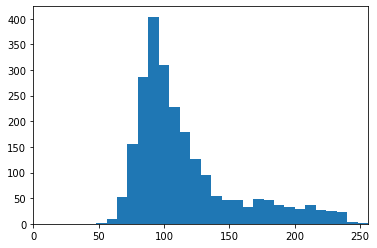

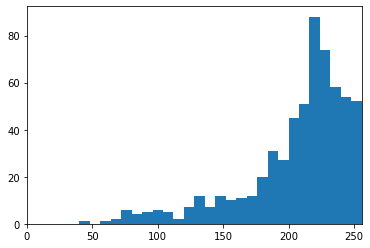

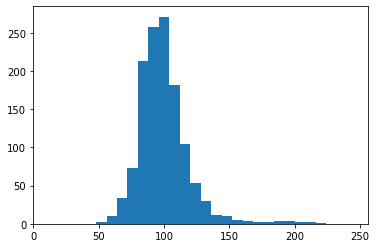

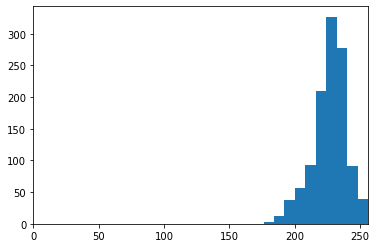

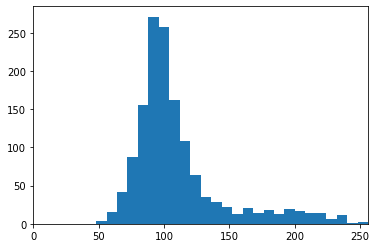

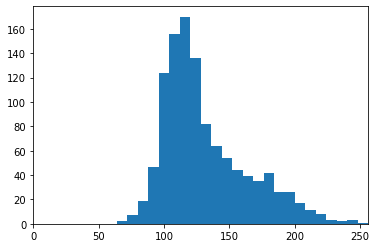

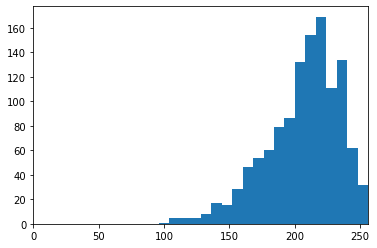

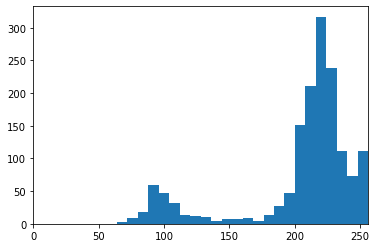

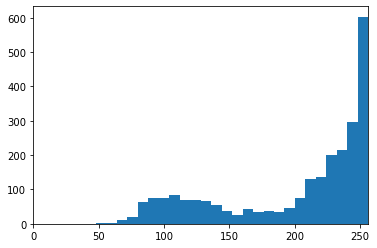

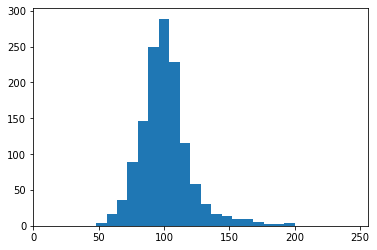

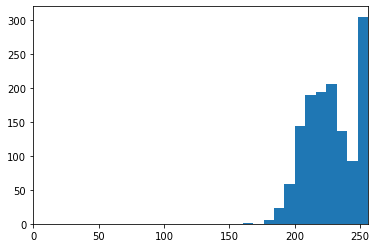

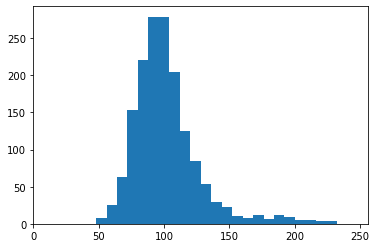

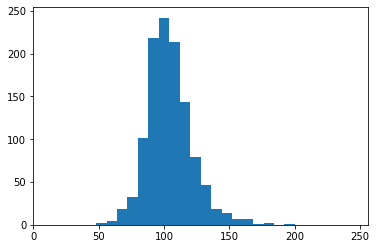

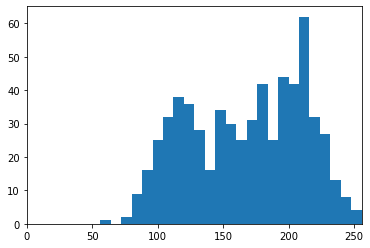

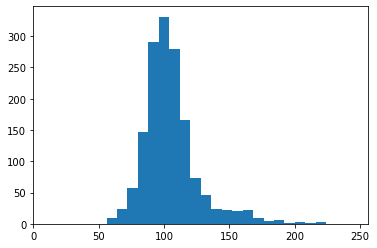

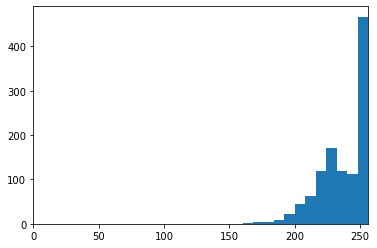

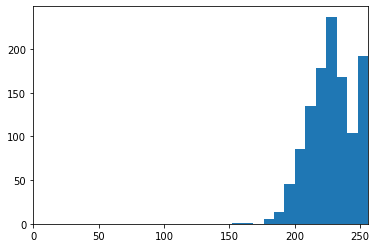

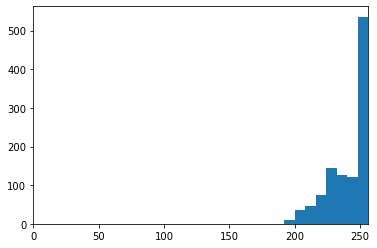

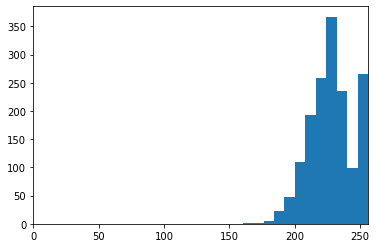

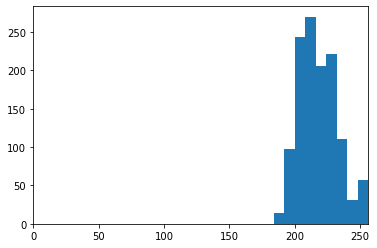

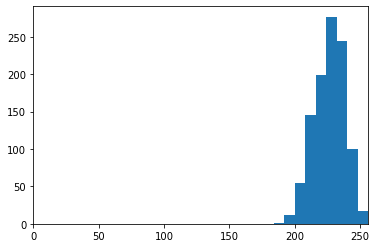

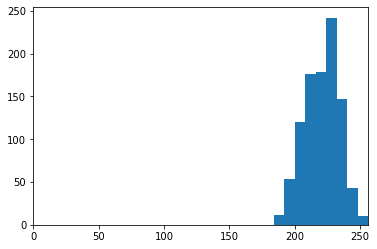

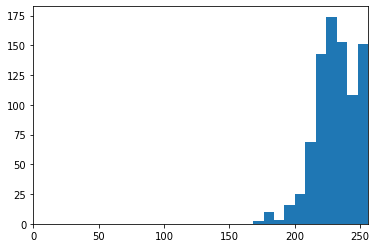

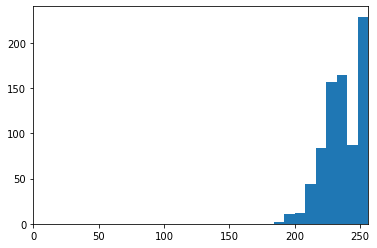

In [85]:
for i in np.unique(segments):
    mask = test_image[segments==i]
    fig, ax = plt.subplots(1, 1)
    ax.hist(mask.ravel(), bins=32, range=[0, 256])
    ax.set_xlim(0, 256);

In [87]:
from skimage.future.graph import rag
import networkx as nx
from skimage.future import graph
from skimage.measure import regionprops
from skimage import color, draw

In [88]:
image = img_as_float(cv2.imread(img_path))
labels = slic(image, n_segments = 100, sigma  = 5)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)

In [89]:
labels = slic(image, n_segments = 100, sigma  = 5)
rag = graph.rag_mean_color(image, labels, mode='similarity')

In [90]:
new_labels = graph.ncut(labels, rag)

In [91]:
np.unique(new_labels)

array([0])

In [92]:
rag

In [93]:
for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']

KeyError: 87

In [94]:
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image
 
    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.
 
    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.
 
    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    for edge in g.edges():
        n1, n2 = edge
 
        r1, c1 = map(int, rag.nodes[n1]['centroid'])
        r2, c2 = map(int, rag.nodes[n2]['centroid'])
 
        line  = draw.line(r1, c1, r2, c2)
        circle = draw.circle(r1,c1,2)
 
        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,1,0
        image[circle] = 1,1,0
 
    return image

In [95]:
def show_img(img):
    width = 10.0
    height = img.shape[0]*width/img.shape[1]
    f = plt.figure(figsize=(width, height))
    plt.imshow(img)

In [96]:
from skimage.future.graph import merge_hierarchical

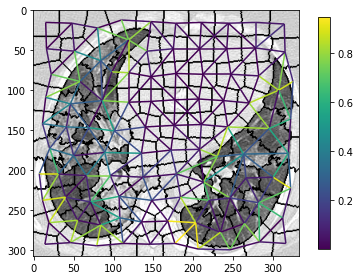

In [148]:
img = img_as_float(cv2.imread(img_path))
labels = slic(img, compactness=30, n_segments=100)
g = graph.rag_mean_color(img, labels)

#fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)

# ax[0].set_title('RAG drawn with default settings')
# lc = graph.show_rag(labels, g, img, ax=ax)
# # specify the fraction of the plot area that will be used to draw the colorbar
# fig.colorbar(lc, fraction=0.03, ax=ax)

# ax[1].set_title('RAG drawn with grayscale image and viridis colormap')
lc = graph.show_rag(labels, g, img,
                    img_cmap='gray', edge_cmap='viridis', ax=ax)
fig.colorbar(lc, fraction=0.03, ax=ax)


fig.tight_layout()
plt.show()
fig.savefig("/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/saved_images/rag_green.svg", format='svg', dpi=1200)


In [98]:
labels = slic(img, compactness=30, n_segments=100)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)
new_labels = graph.ncut(labels, g)

In [99]:
def weight_boundary(graph, src, dst, n):
    """
    Handle merging of nodes of a region boundary region adjacency graph.

    This function computes the `"weight"` and the count `"count"`
    attributes of the edge between `n` and the node formed after
    merging `src` and `dst`.


    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the "weight" and "count" attributes to be
        assigned for the merged node.

    """
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst)/count
    }


def merge_boundary(graph, src, dst):
    """Call back called before merging 2 nodes.

    In this case we don't need to do any computation here.
    """
    pass


In [100]:
from skimage import data, segmentation, filters, color

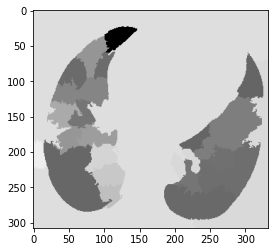

In [169]:
img = img_as_float(cv2.imread(img_path))
edges = filters.sobel(color.rgb2gray(img))
labels = slic(img, compactness=30, n_segments=100)
g = graph.rag_boundary(labels, edges)
plt.figure()
# graph.show_rag(labels, g, img)
# plt.title('Initial RAG')
labels2 = graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_boundary,
                                   weight_func=weight_boundary)


# graph.show_rag(labels, g, img)


# plt.title('RAG after hierarchical merging')

# plt.figure()
out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
plt.imshow(out)
# plt.title('Final segmentation')

# plt.show()
plt.savefig("/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/saved_images/hier_merging_segment.svg", format='svg', dpi=1200)

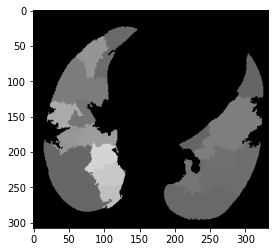

In [175]:
img = img_as_float(cv2.imread(img_path))
edges = filters.sobel(color.rgb2gray(img))
labels = slic(img, compactness=30, n_segments=100)
g = graph.rag_boundary(labels, edges)
plt.figure()
# graph.show_rag(labels, g, img)
# plt.title('Initial RAG')

labels2 = graph.cut_threshold(labels, g, thresh=0.082)

# graph.show_rag(labels, g, img)
# plt.title('Regions separated by threshold=0.082')

# plt.figure()
out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
plt.imshow(out)
# plt.title('Final segmentation')

# plt.show()
# plt.savefig("/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/saved_images/cut_threshold_segment.svg", format='svg', dpi=1200)

In [177]:
out[250,60]

array([0.40569217, 0.40569217, 0.40569217])

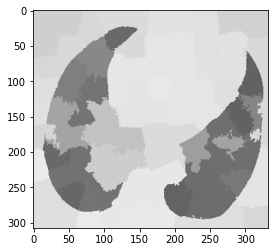

In [173]:
from skimage.future import graph
img = img_as_float(cv2.imread(img_path))
edges = filters.sobel(color.rgb2gray(img))
labels = slic(img, compactness=20, n_segments=100)
g = graph.rag_mean_color(img, labels, connectivity=3, mode='similarity', sigma=255.0)
plt.figure()
# graph.show_rag(labels, g, img)
# plt.title('Initial RAG')

#labels2 = graph.cut_threshold(labels, g, thresh=0.082)

labels2 = graph.cut_normalized(labels, g, thresh = 0.9, num_cuts=20, max_edge=3.0)

# graph.show_rag(labels, g, img)
# plt.title('Ncut by threshold=0.082')

# plt.figure()
out = color.label2rgb(labels2, img, kind='avg', bg_label=1)
plt.imshow(out)
# plt.title('Final segmentation')

# plt.show()
plt.savefig("/Users/makhanov/Yandex.Disk.localized/NU-PhD/Fall2020/ComputerVision/project/saved_images/ncut_segment.svg", format='svg', dpi=1200)